# Chess Game Dataset (Lichess)

Data is Open Source, and can be found here: https://www.kaggle.com/datasets/datasnaek/chess 

About Dataset
General Info

This is a set of just over 20,000 games collected from a selection of users on the site Lichess.org. This set contains the:

- Game ID 
- Rated (T/F)
- Start Time
- End Time
- Number of Turns
- Game Status
- Winner
- Time Increment
- White Player ID
- White Player Rating
- Black Player ID
- Black Player Rating
- All Moves in Standard Chess Notation
- Opening Eco (Standardised Code for any given opening, list here)
- Opening Name
- Opening Ply (Number of moves in the opening phase)


This dataset collects all of the information available from 20,000 games and presents it in a format that is easy to process for analysis of, for example, what allows a player to win as black or white, how much meta (out-of-game) factors affect a game, the relationship between openings and victory for black and white and more.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
df.shape

(20058, 16)

In [5]:
df.dtypes

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

In [6]:
df.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [7]:
# Dropping columns 'created_at' and 'last_move_at', as they are not giving any valueable information. 
df= df.drop(columns=['created_at', 'last_move_at'], axis=1)

In [8]:
df.head(3)

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


In [9]:
# Dropping also columns 'id', 'white_id' and 'black_id', as they are unique. 
df= df.drop(columns=['id', 'white_id', 'black_id'], axis=1)

In [10]:
df.head(3)

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,False,13,outoftime,white,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,True,16,resign,black,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,61,mate,white,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


In [11]:
df.dtypes

rated               bool
turns              int64
victory_status    object
winner            object
increment_code    object
white_rating       int64
black_rating       int64
moves             object
opening_eco       object
opening_name      object
opening_ply        int64
dtype: object

In [12]:
df['victory_status'].unique()

array(['outoftime', 'resign', 'mate', 'draw'], dtype=object)

In [13]:
df['winner'].unique()

array(['white', 'black', 'draw'], dtype=object)

In [14]:
df['opening_ply'].unique()

array([ 5,  4,  3, 10,  6,  1,  9,  2,  8,  7, 17, 11, 12, 13, 18, 19, 15,
       16, 14, 28, 20, 22, 24], dtype=int64)

In [15]:
print("Number of unique values for opening name: ", len(df['opening_name'].unique()))
print("Number of unique values for increment code: ", len(df['increment_code'].unique()))
print("Number of unique values for opening eco: ", len(df['opening_eco'].unique()))

Number of unique values for opening name:  1477
Number of unique values for increment code:  400
Number of unique values for opening eco:  365


# <i><u>Some ideas for data visualization</u></i>

- What is the distribution of player ratings
- What is the percentage of rated players vs not rated 
- What openings are most popular 
- Is there any dependency between opening and score 
- Is there any dependency between color and score 
- Is there any dependency between rating difference and score
- Which time and increment type causes game to be played very long 
- How often players win by resign or mate

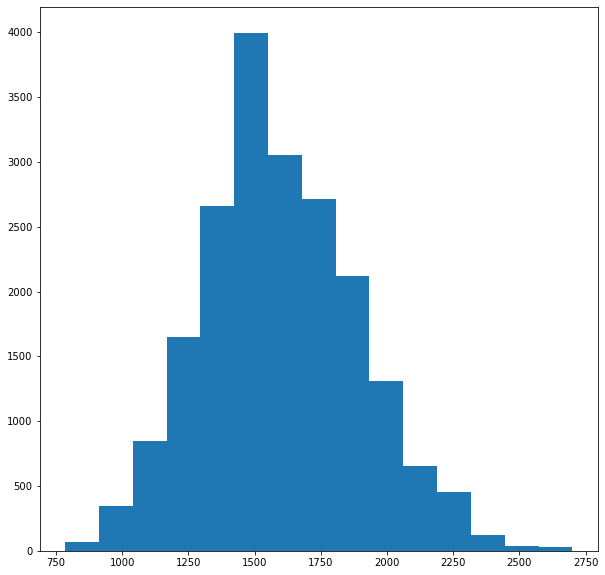

In [16]:
# What is the distribution of white players ratings
plt.figure(figsize=(10,10))
plt.hist(df['white_rating'], bins=15)
plt.show()

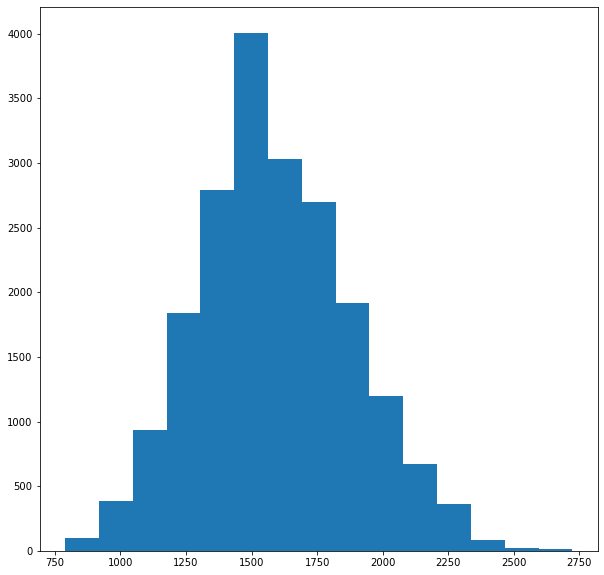

In [17]:
# What is the distribution of black players ratings
plt.figure(figsize=(10,10))
plt.hist(df['black_rating'], bins=15)
plt.show()

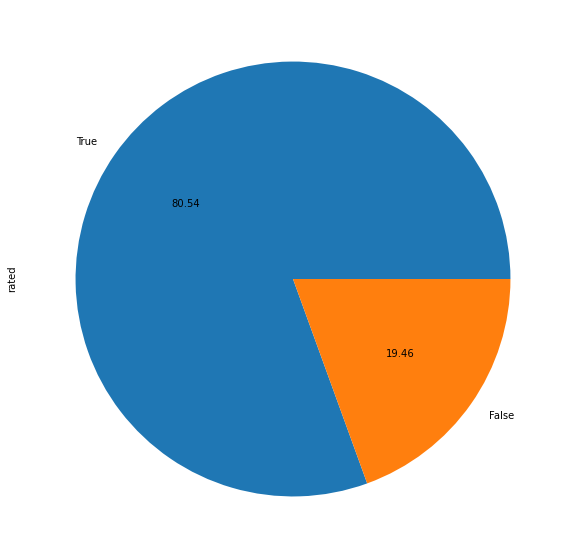

In [18]:
# What is the percentage of rated players vs not rated
plt.figure(figsize=(10,10))
df['rated'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()